# More Origami Api Examples

Origami has a very simple syntax, focusing on function pipelines. 
Here are a few examples on how to work on images with origami using those pipelines. 

In [1]:
(ns opencv4.dolphin
(:require
  [opencv4.utils :as u]
  [opencv4.colors.rgb :as rgb]
  [opencv4.core :refer :all]))

nil

## highlights air balloons using canny

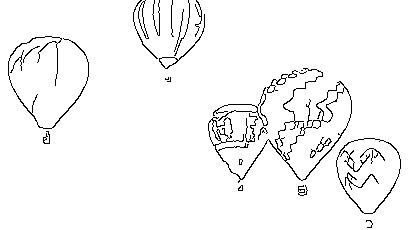

In [2]:
(-> "http://www.v3wall.com/wallpaper/1366_768/0912/1366_768_20091223010850201138.jpg"
 u/mat-from-url
 (u/resize-by 0.3)
 (median-blur! 3)
 (cvt-color! COLOR_BGR2GRAY)
 (canny! 300.0 100.0 3 true)
 (bitwise-not!)
 (u/>>>))

## Invert and blur picture

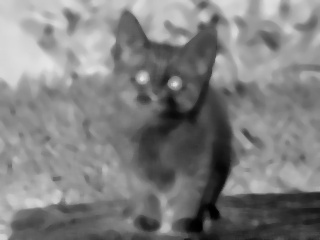

In [2]:
(-> "resources/images/cat.jpg"
  imread
  clone
  (u/resize-by 0.2)
  (median-blur! 7)
  (cvt-color! COLOR_BGR2GRAY)
  bitwise-not!
  u/>>>)

## Find contours of headphones

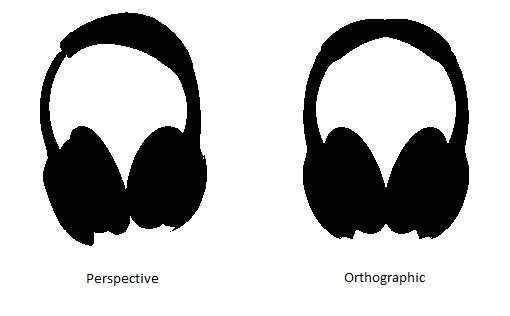

In [3]:
(def headphones (-> "resources/morph/headphone.png" imread))
(u/>>> headphones)

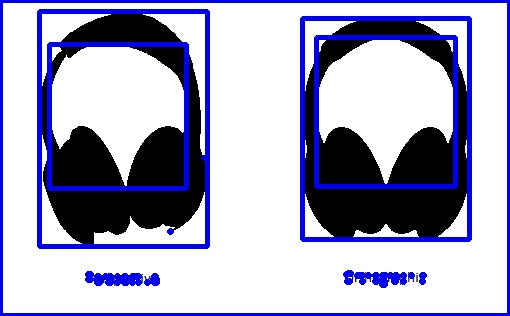

In [4]:
(defn find-contours! [ mat ]
  (let[ contours (new-arraylist) ]
	(find-contours mat contours (new-mat) RETR_LIST CHAIN_APPROX_SIMPLE)
    contours))

(def headphones1 
  (clone headphones))

(-> headphones1 
    (clone)
    (cvt-color! COLOR_BGR2GRAY) 
    (find-contours!)
    ((fn[x] (doall (map #(rectangle headphones1 (bounding-rect %) rgb/blue-2 3) x)) headphones1))
    (u/>>>))

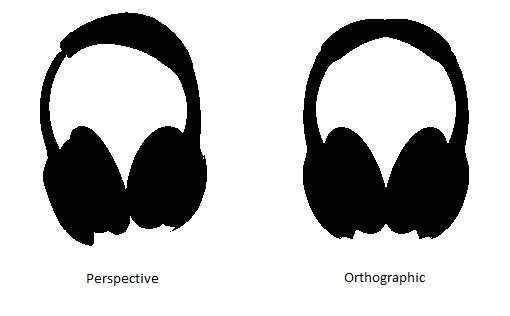

In [6]:
(def headphones2 (clone headphones))
(def contours (new-arraylist))

(doseq [c contours]
  (if (> (contour-area c) 100 )
    (let [ rect (bounding-rect c)]
      (if (> (.height rect) 28)
      (rectangle headphones2 rect rgb/blue-2 3)))))

(u/>>> headphones2)